In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Homework #1 - Linear Regression on Boston Housing Dataset
## By: Andrey Novichkov
04/08/20

In [2]:
boston = load_boston()

print(f'Shape: {boston.data.shape}')

df = pd.DataFrame(boston.data)
df.columns = boston.feature_names
df['PRICE'] = boston.target

df.head()

Shape: (506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in $1000's

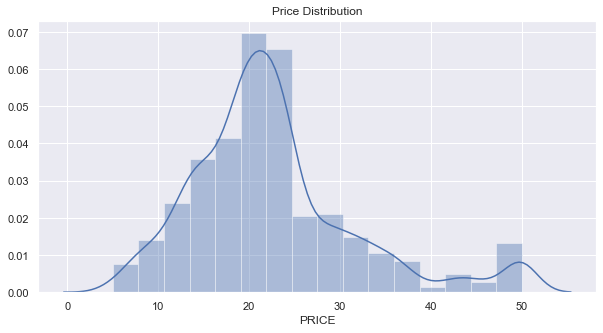

In [4]:
# Plot price distribution
sns.set(rc={'figure.figsize':(10,5)})
_= sns.distplot(df['PRICE'].dropna(), hist=True, bins=16).set_title("Price Distribution")

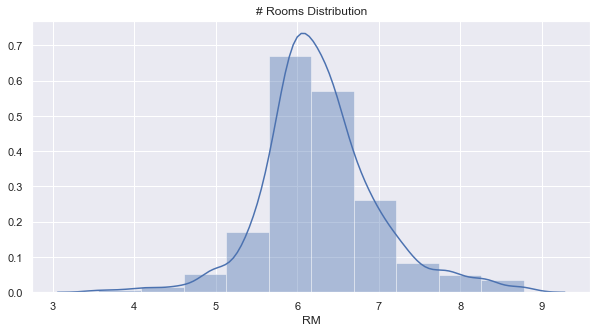

In [5]:
# Plot # Rooms Distribution
_= sns.distplot(df['RM'].dropna(), hist=True, bins=10).set_title("# Rooms Distribution")

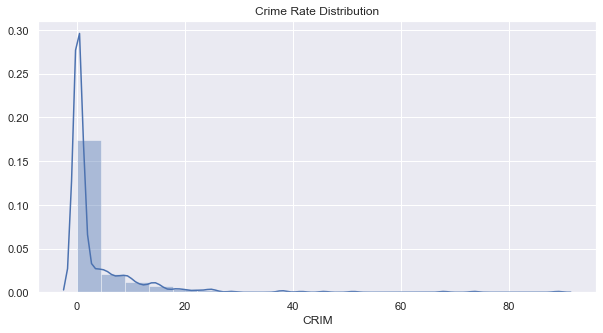

In [6]:
# Plot Crime Rate Distribution
_= sns.distplot(df['CRIM'].dropna(), hist=True, bins=20).set_title("Crime Rate Distribution")

In [7]:
# Get feature columns
feature_cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
# feature_cols = ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
feature_df = df[feature_cols]
feature_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


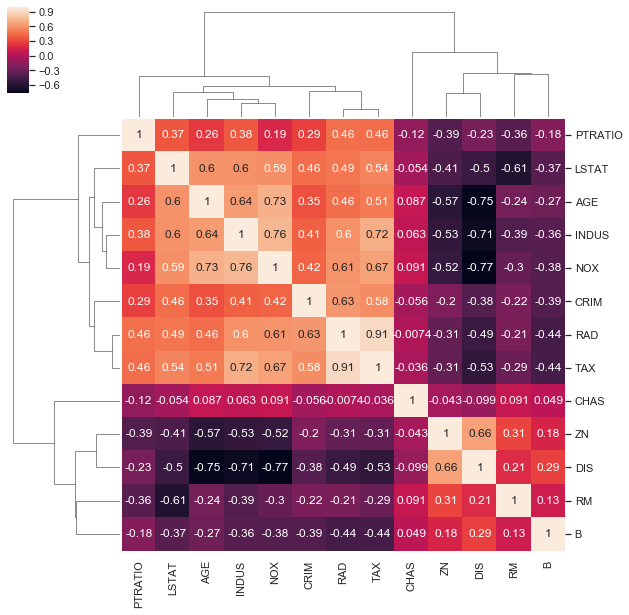

In [8]:
# Find correlation, if there is correlation, that is not good
sns.set(rc={'figure.figsize':(15,10)})
_= sns.clustermap(feature_df.corr(), annot=True, xticklabels=feature_df.columns, yticklabels=feature_df.columns)

In [9]:
# We can see that there are a couple of pairs whose correlation is higher than average: corr > .7
CORR_COEF = .8

In [10]:
def find_corr_pairs(df, corr_coef):
    pairs = []
    for col, content in df.items():
        for index, corr_val in zip(content.index, content):
            if corr_val > corr_coef and corr_val != 1:
                pairs.append((col, index))
    return pairs

In [11]:
print(f'Pairs with corr values > {CORR_COEF}: {find_corr_pairs(feature_df.corr(), CORR_COEF)}')

Pairs with corr values > 0.8: [('RAD', 'TAX'), ('TAX', 'RAD')]


In [12]:
# Only two pairs are above our coef of .8, so let's get rid of TAX, as it has other high correlations

In [13]:
# Get feature columns
feature_cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT']
feature_df = df[feature_cols]
feature_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33


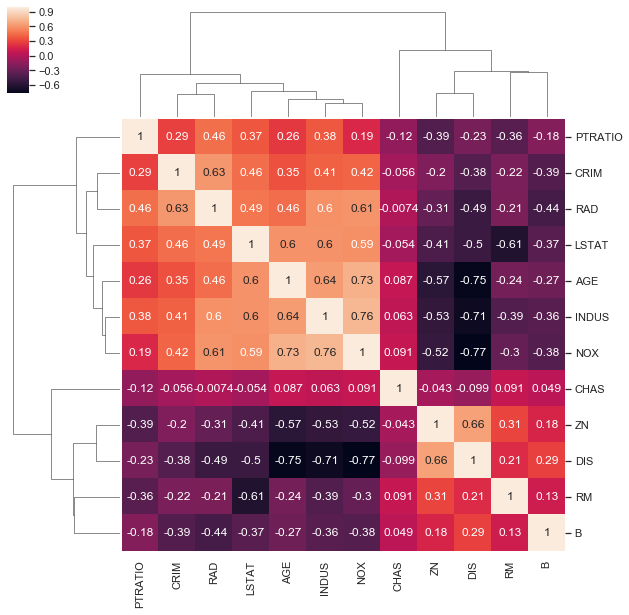

In [14]:
# Find correlation, if there is correlation, that is not good
sns.set(rc={'figure.figsize':(15,10)})
_= sns.clustermap(feature_df.corr(), annot=True, xticklabels=feature_df.columns, yticklabels=feature_df.columns)

In [15]:
# That's better :)
# Now let's get to the model training

In [16]:
# First we have to split the data into training and testing sets
from sklearn.model_selection import train_test_split

X = feature_df.to_numpy()
y = df['PRICE'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

regression_model = LinearRegression()

# Fit the model
reg_fit = regression_model.fit(X_train, y_train)
print("Linear Regression Model:")
print(f'-> Coefficients: {reg_fit.coef_}')
print(f'-> Y intercept: {reg_fit.intercept_}')


# Now we can predict y values from our X_test set of features
y_pred = reg_fit.predict(X_test)
print(f'Model Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'Model R^2 score: {reg_fit.score(X_test, y_test)}')

Linear Regression Model:
-> Coefficients: [-1.16434409e-01  3.45556404e-02 -9.41407036e-02  2.69893425e+00
 -1.62454194e+01  3.86167829e+00 -8.44653420e-03 -1.43193827e+00
  8.34556243e-02 -1.01895133e+00  8.50415013e-03 -4.96688615e-01]
-> Y intercept: 35.350036563741284
Model Mean Squared Error: 30.55658703392087
Model R^2 score: 0.6259858595591252


In [18]:
# Looking at the R^2 score we can see that it is relatively close to 1. Can we improve this though?
# Let's try noramlization techniques to try to improve our model

In [19]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

# Get feature columns
feature_cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT']
feature_df = df[feature_cols]

norm_X_train = min_max_scaler.fit_transform(X_train)
norm_X_test = min_max_scaler.transform(X_test)

In [20]:
# Now we do the same model fitting and predictions as before. 
# let's see how it performs after we normalize using the minMax Scaler

In [21]:
regression_model = LinearRegression()

# Fit the model
reg_fit = regression_model.fit(norm_X_train, y_train)
print("Linear Regression Model:")
print(f'-> Coefficients: {reg_fit.coef_}')
print(f'-> Y intercept: {reg_fit.intercept_}')


# Now we can predict y values from our X_test set of features
y_pred = reg_fit.predict(norm_X_test)
print(f'Model Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'Model R^2 score: {reg_fit.score(norm_X_test, y_test)}')

Linear Regression Model:
-> Coefficients: [-10.35915544   3.45556404  -2.56815839   2.69893425  -7.89527381
  20.15409897  -0.82015847 -15.68301747   1.91947936  -9.57814253
   3.37257586 -17.50827366]
-> Y intercept: 27.48518788534333
Model Mean Squared Error: 30.556587033920948
Model R^2 score: 0.6259858595591243


In [188]:
y_test[:5]

array([22.6, 50. , 23. ,  8.3, 21.2])

In [189]:
y_pred[:5]

array([27.06673435, 23.60620272, 28.64672102, 11.88306964, 21.98866202])

In [190]:
# So Min Max Scaler did not seem to change the score at all... Interesting. Let's try the Standard Scaler

In [191]:
from sklearn import preprocessing

standard_scaler = preprocessing.StandardScaler()

# Get feature columns
feature_cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT']
feature_df = df[feature_cols]

norm_X = standard_scaler.fit_transform(feature_df)
y = df['PRICE'].to_numpy()

In [192]:
# And do the same model fitting and prediction and score analysis

In [193]:
X_train, X_test, y_train, y_test = train_test_split(norm_X, y, test_size=0.25, random_state=0)

In [194]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

regression_model = LinearRegression()

# Fit the model
reg_fit = regression_model.fit(X_train, y_train)
print("Linear Regression Model:")
print(f'-> Coefficients: {reg_fit.coef_}')
print(f'-> Y intercept: {reg_fit.intercept_}')


# Now we can predict y values from our X_test set of features
y_pred = reg_fit.predict(X_test)
print(f'Model Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'Model R^2 score: {reg_fit.score(X_test, y_test)}')

Linear Regression Model:
-> Coefficients: [-1.0005257   0.80512554 -0.64519996  0.6848355  -1.88062036  2.71059893
 -0.23752526 -3.01226594  0.72595136 -2.20379323  0.77561767 -3.54337739]
-> Y intercept: 22.444970239525713
Model Mean Squared Error: 30.55658703392091
Model R^2 score: 0.6259858595591248


In [149]:
# Well our coefficients changed, but the overall score stayed exactly the same.. interesting...

In [195]:
# What if we get rid of more correlating features by lowering our CORR_COEF to .7
print(f'Pairs with corr values > {CORR_COEF}: {find_corr_pairs(feature_df.corr(), .7)}')

Pairs with corr values > 0.8: [('INDUS', 'NOX'), ('NOX', 'INDUS'), ('NOX', 'AGE'), ('AGE', 'NOX')]


In [196]:
# Let's get rid of INDUS and NOX
# Get feature columns
feature_cols = ['CRIM', 'ZN', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT']
feature_df = df[feature_cols]
feature_df.head()

,CRIM,ZN,CHAS,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
0,0.00632,18.0,0.0,6.575,65.2,4.0900,1.0,15.3,396.90,4.98
1,0.02731,0.0,0.0,6.421,78.9,4.9671,2.0,17.8,396.90,9.14
2,0.02729,0.0,0.0,7.185,61.1,4.9671,2.0,17.8,392.83,4.03
3,0.03237,0.0,0.0,6.998,45.8,6.0622,3.0,18.7,394.63,2.94
4,0.06905,0.0,0.0,7.147,54.2,6.0622,3.0,18.7,396.90,5.33


In [197]:
# And lets build our model!

In [199]:
X = feature_df.to_numpy()
y = df['PRICE'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

regression_model = LinearRegression()

# Fit the model
reg_fit = regression_model.fit(X_train, y_train)
print("Linear Regression Model:")
print(f'-> Coefficients: {reg_fit.coef_}')
print(f'-> Y intercept: {reg_fit.intercept_}')


# Now we can predict y values from our X_test set of features
y_pred = reg_fit.predict(X_test)
print(f'Model Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'Model R^2 score: {reg_fit.score(X_test, y_test)}')

Linear Regression Model:
-> Coefficients: [-0.10145036  0.03597325  2.60769521  4.29057277 -0.02862175 -0.97846147
 -0.01423829 -0.88714415  0.00990022 -0.52786901]
-> Y intercept: 20.546555131659566
Model Mean Squared Error: 32.99180328562559
Model R^2 score: 0.5961786918882757


In [200]:
# Oops.. Score went down...

In [201]:
# What if we dont remove any features...
feature_cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
feature_df = df[feature_cols]

X = feature_df.to_numpy()
y = df['PRICE'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

regression_model = LinearRegression()

# Fit the model
reg_fit = regression_model.fit(X_train, y_train)
print("Linear Regression Model:")
print(f'-> Coefficients: {reg_fit.coef_}')
print(f'-> Y intercept: {reg_fit.intercept_}')


# Now we can predict y values from our X_test set of features
y_pred = reg_fit.predict(X_test)
print(f'Model Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'Model R^2 score: {reg_fit.score(X_test, y_test)}')

Linear Regression Model:
-> Coefficients: [-1.17735289e-01  4.40174969e-02 -5.76814314e-03  2.39341594e+00
 -1.55894211e+01  3.76896770e+00 -7.03517828e-03 -1.43495641e+00
  2.40081086e-01 -1.12972810e-02 -9.85546732e-01  8.44443453e-03
 -4.99116797e-01]
-> Y intercept: 36.93325545712031
Model Mean Squared Error: 29.78224509230252
Model R^2 score: 0.635463843320211


In [202]:
# Intersting, so now our score is higher than ever! 
# Let's try noramlizing now...

In [203]:
from sklearn import preprocessing

standard_scaler = preprocessing.StandardScaler()

# Get feature columns
norm_X = standard_scaler.fit_transform(feature_df)
y = df['PRICE'].to_numpy()

In [207]:
X_train, X_test, y_train, y_test = train_test_split(norm_X, y, test_size=0.25, random_state=0)

regression_model = LinearRegression()

# Fit the model
reg_fit = regression_model.fit(X_train, y_train)
print("Linear Regression Model:")
print(f'-> Coefficients: {reg_fit.coef_}')
print(f'-> Y intercept: {reg_fit.intercept_}')


# Now we can predict y values from our X_test set of features
y_pred = reg_fit.predict(X_test)
print(f'Model Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'Model R^2 score: {reg_fit.score(X_test, y_test)}')

Linear Regression Model:
-> Coefficients: [-1.01170421  1.02558108 -0.03953238  0.60731239 -1.80467996  2.64552328
 -0.19783648 -3.018615    2.0883816  -1.90212879 -2.13154559  0.77017134
 -3.56070005]
-> Y intercept: 22.40880610329137
Model Mean Squared Error: 29.78224509230236
Model R^2 score: 0.6354638433202129


In [208]:
# No change again... Need to bring this up in the class..

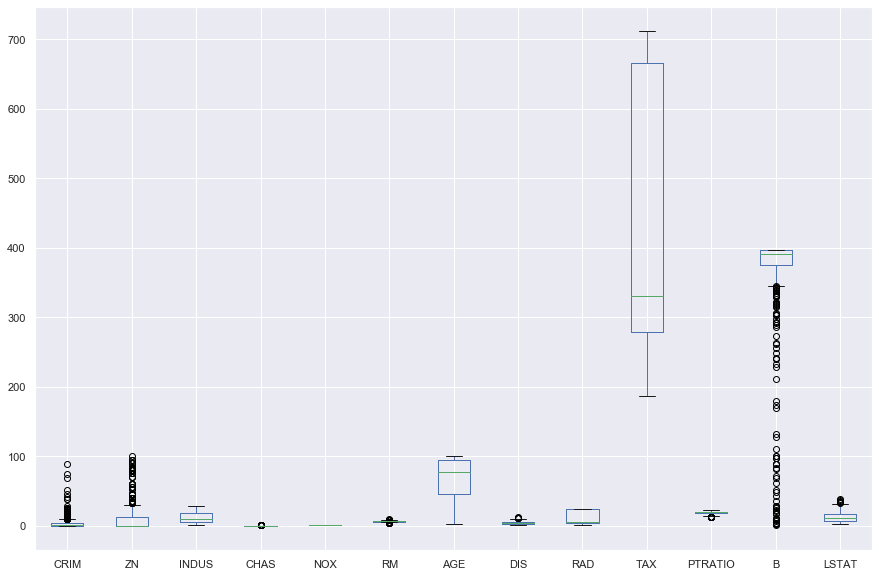

In [210]:
_= feature_df.plot(kind='box')

In [ ]:
# Hmm.. Maybe this has to 